# Hypothesis 2: Litter accumulation varies significantly between the Celtic and Greater North Sea areas.

## Hypothesis
- **Alternative Hypothesis (H₁):** Litter accumulation varies significantly between these areas.  
- **Null Hypothesis (H₀):** There is no significant difference in litter accumulation between these areas.  

## Rationale


Litter accumulation may be different between the Celtic Sea and the Greater North Sea because of factors like wind speeds, water currents, and local waste management practices. 

For example, the Celtic Sea has average wind speeds of about 9 m/s (MHPA, 2023), while the Greater North Sea may experience higher wind speeds, over 10 m/s (Offshore Energy SEA 3, 2023).

 These differences in environmental conditions, along with regional policies and clean-up efforts, could affect how much litter ends up in each area. By comparing the two regions, we can see if there's a significant difference in litter accumulation and understand how to better manage waste in each area.

## Data Analysis & Validation Approach

To explore this hypothesis, we will first conduct an Exploratory Data Analysis (EDA). 

This will involve:

 - Line charts and bar charts focusing on `totallitter` between the Celtic and Greater North Sea areas. This will help us see if one area consistently has more litter than the other over time. 
 
  - Heatmap to geographically assess if there is a significant difference between the accumulation of litter across the regions.

Following the EDA, we will use two statistical methods to validate our findings:

-   - First, check if data is normally distributed using:  
    - A Plot & Shapiro-Wilk test for a normal distribution  
    <br>
  - If the data is normal normal: 
    - **T-test**  : for comparing the average amount of litter between the seas and determines if the difference is real or by chance.
    
    <br>

  - If the data is not normal:
    - **Mann-Whitney U test** : Instead of comparing averages, it compares medians of litter between the two seas.

# Change working directory

To facilitate proper file access, the working directory is to be adjusted to its parent directory
* os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/NEA-Seafloor-Litter-Analysis/NEA-Seafloor-Litter-Analysis/jupyter_notebooks'

To set the parent of the current directory the new current directory:
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/NEA-Seafloor-Litter-Analysis/NEA-Seafloor-Litter-Analysis'

Confirm the new current directory

## Loading CSV's & Importing Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/02_PROCESSED_NEA-Seafloor-Litter.csv')
df_alltime = pd.read_csv('data/03_ALL_TIME_litter_totals.csv')
df_yearly = pd.read_csv('data/04_YEARLY_litter_totals.csv')
df_monthly = pd.read_csv('data/05_MONTHLY_litter_totals.csv')


### Visual Exploration: Line Chart and Bar Chart

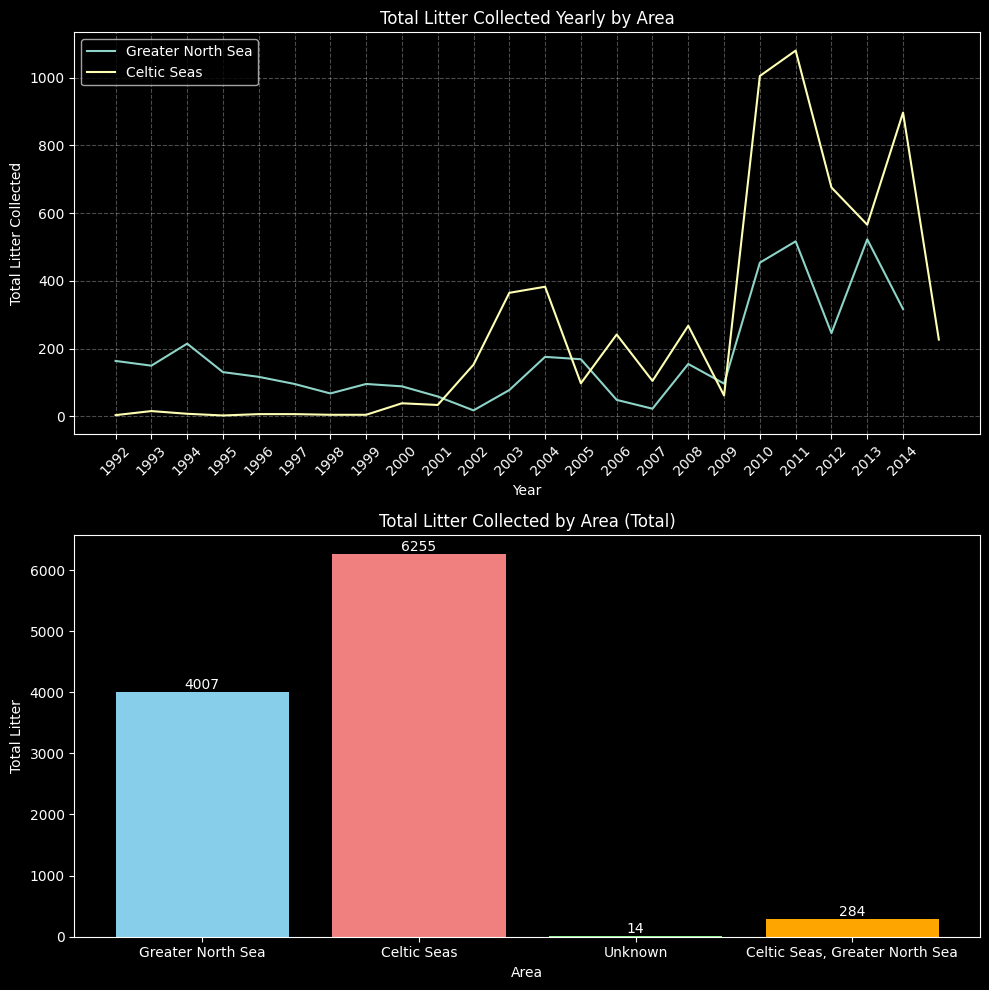

In [5]:
plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))  # Create 2 subplots vertically

# Line chart (top subplot)
ns = df[df['area'] == 'Greater North Sea']
cs = df[df['area'] == 'Celtic Seas']
north_sea_litter_by_year = ns.groupby('year')['totallitter'].sum()
celtic_sea_litter_by_year = cs.groupby('year')['totallitter'].sum()

# Plotting the line chart
ax1.plot(north_sea_litter_by_year.index, north_sea_litter_by_year, label='Greater North Sea')
ax1.plot(celtic_sea_litter_by_year.index, celtic_sea_litter_by_year, label='Celtic Seas')
ax1.set_title('Total Litter Collected Yearly by Area')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Litter Collected')
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.set_xticks(north_sea_litter_by_year.index)
ax1.set_xticklabels(north_sea_litter_by_year.index, rotation=45)
ax1.legend()

# Bar chart (bottom subplot)

# Total litter collected by area
litter_by_area = df.groupby('area')['totallitter'].sum()

# totalling the litter collected in the Greater North Sea and the Celtic Seas
north_sea_total = litter_by_area['Greater North Sea']
celtic_sea_total = litter_by_area['Celtic Seas']
both = litter_by_area['Celtic Seas, Greater North Sea']
unknown = litter_by_area['Unknown']
areas = ['Greater North Sea', 'Celtic Seas', 'Unknown', 'Celtic Seas, Greater North Sea']

totals = [north_sea_total, celtic_sea_total, unknown, both]

# Plotting the bar chart
ax2.bar(areas, totals, color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
ax2.set_title('Total Litter Collected by Area (Total)')
ax2.set_xlabel('Area')
ax2.set_ylabel('Total Litter')

# annotate the bars with the total litter collected
for i, total in enumerate(totals):
    ax2.text(i, total, total, ha='center', va='bottom')

plt.tight_layout()
plt.show()

The results, as shown in the line chart and bar graph, demonstrate a clear difference in total litter collected between the Greater North Sea and the Celtic Seas. The bar chart shows that the Celtic Seas had a substantially higher total litter count compared to the Greater North Sea. This initial observation provides evidence to support the alternative hypothesis (H₁).

### Trend Visualisation: Litter Density Heatmaps

In [6]:
# Spatial Heatmaps

# Importing the necessary libraries
import folium
from folium.plugins import HeatMap

greater_ns = df[df['area'] == 'Greater North Sea']

gns = folium.Map(location=[55, 0], zoom_start=4.5, tiles='cartodbpositron')

HeatMap(greater_ns[['Latitude', 'Longitude']], radius=8, max_zoom=13).add_to(gns)

# Add a title and subtitle
folium.TileLayer('cartodbpositron').add_to(gns)
folium.LayerControl().add_to(gns)
title_html = '''
             <h3 align="center" style="font-size:16px; margin-top: 10px; font-weight: bold;">Litter Density in the Greater North Sea</h3>
             <p align="center" style="font-size:12px; margin-top: 10px;">Based on Survey Data from 1992-2015</p>
             '''
gns.get_root().html.add_child(folium.Element(title_html))

gns

gns

In [7]:
from IPython.display import Image

Image(url='')

In [8]:
# Filter the data for the Celtic Sea
celtic_sea = df[df['area'] == 'Celtic Seas']

# Celtic Sea map , with the coordinates of the center of the map and the zoom level
cs = folium.Map(location=[52, 0], zoom_start=5, tiles='cartodbpositron')

HeatMap(celtic_sea[['Latitude', 'Longitude']], radius=8, max_zoom=13).add_to(cs)

# Add a title and subtitle
folium.TileLayer('cartodbpositron').add_to(cs)
folium.LayerControl().add_to(cs)
title_html = '''
             <h3 align="center" style="font-size:16px; font-weight: bold; margin-top: 10px;">Litter Density in the Celtic Sea</h3>
             <p align="center" style="font-size:12px; margin-top: 10px;">Based on Survey Data from 1992-2015</p>
             '''
cs.get_root().html.add_child(folium.Element(title_html))

cs


**Analysis:** The heatmaps revealed distinct patterns of litter distribution between the two regions. In the Greater North Sea, litter density appeared more dispersed, with areas of moderate concentration spread across a wider area. Conversely, the Celtic Sea heatmap showed a more focused pattern, with intense "hot spots" of litter concentration, particularly near coastal areas. These findings suggest that litter accumulation patterns differ significantly between the two regions.

### Assessing Normality: Shapiro-Wilk test

To investigate x, y was used.

This method was selected because -

analysis

### Trend Confirmation: T-test or Mann-Whitney U

analysis -

## Conclusion

Both the OLS regression and Mann-Kendall test confirm a clear and statistically significant upward trend in plastic litter over time. The regression analysis shows that the plastic litter count increases by approximately 1.44 units per time period, while the Mann-Kendall test indicates a similar rate of increase at 1.35 units. Both analyses provide strong evidence that this trend is real and not due to random chance, with extremely small p-values supporting the reliability of the results. This suggests that plastic litter is steadily increasing, highlighting the need for targeted interventions.

Based on the results from x, y , we x the null hypothesis (H₀) and y the alternative hypothesis (H₁). The data shows abc

## Ref

- MHPA (2023). The Celtic Sea: The new floating frontier in offshore wind development. Retrieved from https://www.mhpa.co.uk/latest-news-and-blog/the-celtic-sea-the-new-floating-frontier-in-offshore-wind-development/

- Offshore Energy SEA 3 (2023). Appendix 1: Environmental Baseline - Climate & Meteorology. Retrieved from https://assets.publishing.service.gov.uk/media/5a7f5feaed915d74e622a137/OESEA3_A1f_Climate___Meteorology.pdf